In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

from sklearn.metrics import r2_score
from matplotlib import pyplot
import numpy as np
%matplotlib inline

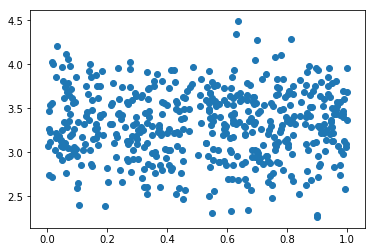

In [39]:
n_sample = 500
n_sample2 = 500
n_feature = 10
n_dimy = 1
x = np.random.random(n_sample * n_feature).reshape(n_sample,n_feature)
x2 = np.random.random(n_sample2 * n_feature).reshape(n_sample2,n_feature)
w = np.random.random(n_feature)
r = np.random.random(n_feature)
y_true = np.zeros(n_sample*n_dimy).reshape(n_sample,n_dimy)
y_true2 = np.zeros(n_sample2*n_dimy).reshape(n_sample2,n_dimy)
for i in np.arange(n_feature):
    for j in np.arange(n_dimy):
        tmpw = np.random.random(1)
        tmpr = np.random.random(1)
        y_true[:,j] += x[:,i] ** tmpr * tmpw
        y_true2[:,j] += x2[:,i] ** tmpr * tmpw
    
    #y_true[:,0] += x[:,i] ** 1 * w[i]
# 第１説明変数と被説明変数との散布図をプロットしてみる
pyplot.scatter(x[:,0],y_true[:,0])
pyplot.show()

In [40]:
X1 = x
Y1 = y_true
X2 = x2
Y2 = y_true2
# create model
model = Sequential()
model.add(Dense(units=100, activation="tanh", kernel_initializer="uniform", input_dim=n_feature))
model.add(Dropout(0.2))
model.add(Dense(units=100, activation="relu", kernel_initializer="uniform"))
model.add(Dropout(0.2))
model.add(Dense(units=100, activation="relu", kernel_initializer="uniform"))
model.add(Dropout(0.2))
model.add(Dense(units=n_dimy, activation="linear", kernel_initializer="uniform"))



In [41]:
# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [42]:
# Fit the model
model.fit(X1, Y1, nb_epoch=1000, batch_size=10,  verbose=0)

# Calculate predictions
PredTestSet = model.predict(X1)
PredTestSet2 = model.predict(X2)


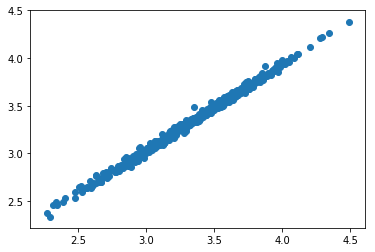

In [43]:
pyplot.scatter(Y1,PredTestSet)
pyplot.show()

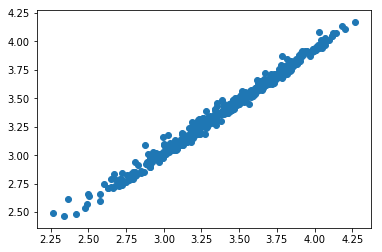

In [44]:
pyplot.scatter(Y2,PredTestSet2)
pyplot.show()